In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [14]:
# Load dataset
df = pd.read_csv("../data/raw/diabetic_data.csv")
df.shape

(101766, 50)

### 1. Basic exploratoin

In [15]:
# Basic overview
print("Shape (raws, cols):", df.shape)
df.head()

Shape (raws, cols): (101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

data types overview:
- the dataset has 101766 observasions and 50 columns
- 13 numeric columns
- 37 categorical columns


In [17]:
df.columns# Check missing values (NaN only)
missing_nan = df.isna().sum()

# Check '?' values
missing_question = (df == "?").sum()

# Combine
missing_summary = pd.DataFrame({
    "NaN_missing": missing_nan,
    "Question_mark_missing": missing_question,
    "Total_missing": missing_nan + missing_question,
    "Percent_missing": ((missing_nan + missing_question) / len(df)) * 100
}).sort_values("Percent_missing", ascending=False)

missing_summary.head(15)

,NaN_missing,Question_mark_missing,Total_missing,Percent_missing
weight,0,98569,98569,96.858479
max_glu_serum,96420,0,96420,94.746772
A1Cresult,84748,0,84748,83.277322
medical_specialty,0,49949,49949,49.082208
payer_code,0,40256,40256,39.557416
race,0,2273,2273,2.233555
diag_3,0,1423,1423,1.398306
diag_2,0,358,358,0.351787
diag_1,0,21,21,0.020636
encounter_id,0,0,0,0.000000


The dataset contains missing values represented both as NaN and as "?".

This indicates that some columns may need to be removed or carefully handled during the data cleaning stage, especially those with extremely high missing percentages.

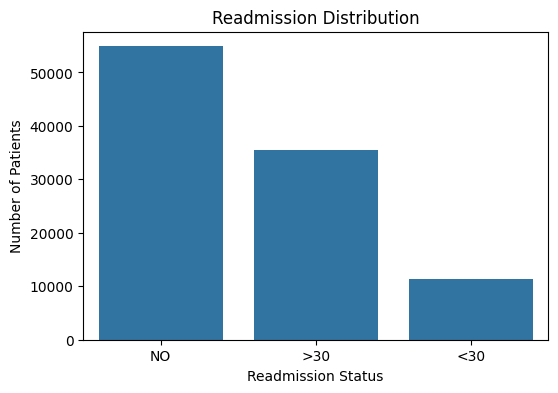

In [ ]:

# Visualize target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x="readmitted", data=df)

plt.title("Readmission Distribution")
plt.xlabel("Readmission Status")
plt.ylabel("Number of Patients")

plt.show()

Most patients were not readmitted; fewer were readmitted within 30 days (<30)

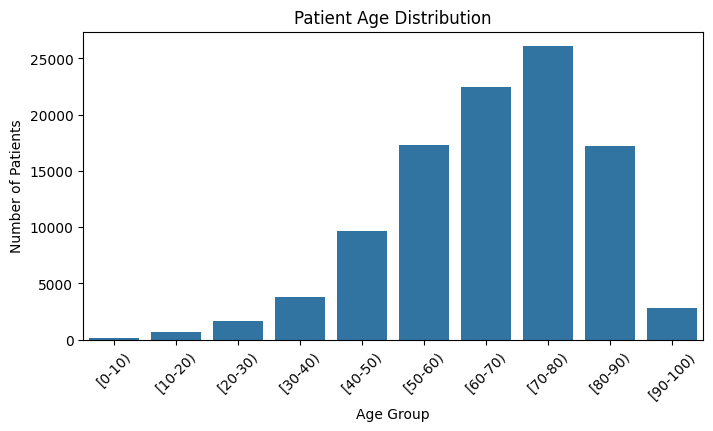

In [23]:
# Visualize patient age distribution
plt.figure(figsize=(8,4))
sns.countplot(x="age", data=df, order=sorted(df["age"].unique()))

plt.title("Patient Age Distribution")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")

plt.xticks(rotation=45)
plt.show()

Most patients are older adults, especially between 60–80 years

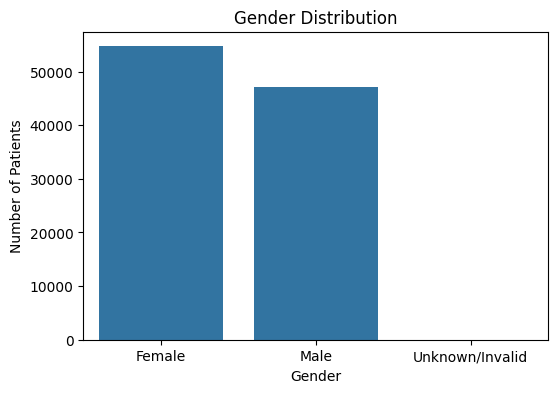

In [24]:
# Visualize gender distribution
plt.figure(figsize=(6,4))
sns.countplot(x="gender", data=df)

plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Number of Patients")

plt.show()

Dataset has slightly more female than male patients

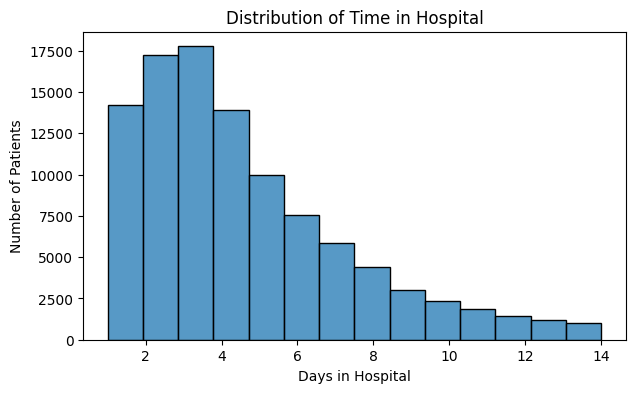

In [25]:
# Visualize length of hospital stay
plt.figure(figsize=(7,4))
sns.histplot(df["time_in_hospital"], bins=14)

plt.title("Distribution of Time in Hospital")
plt.xlabel("Days in Hospital")
plt.ylabel("Number of Patients")

plt.show()


Most patients stay between 2–5 days; long hospital stays are less common

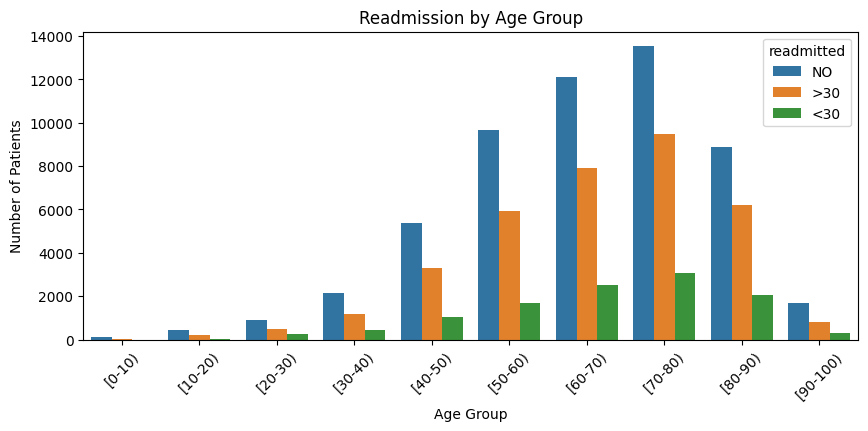

In [26]:
# Readmission by age group
plt.figure(figsize=(10,4))
sns.countplot(x="age", hue="readmitted", data=df, order=sorted(df["age"].unique()))

plt.title("Readmission by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Patients")

plt.xticks(rotation=45)
plt.show()

Readmissions are more frequent among older patients, especially age 60–80

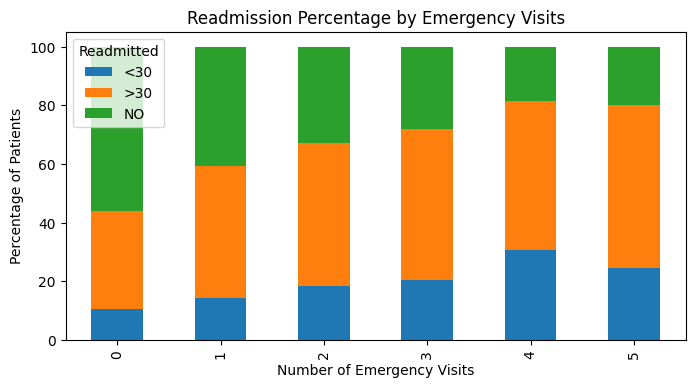

In [29]:
# Readmission rate by emergency visits (percentage)
subset = df[df["number_emergency"] <= 5]

# Create percentage table
table = pd.crosstab(subset["number_emergency"], subset["readmitted"], normalize="index") * 100

# Plot
table.plot(kind="bar", stacked=True, figsize=(8,4))

plt.title("Readmission Percentage by Emergency Visits")
plt.xlabel("Number of Emergency Visits")
plt.ylabel("Percentage of Patients")

plt.legend(title="Readmitted")
plt.show()

Patients with more emergency visits tend to have higher readmission rates

In [10]:
# Columns with more than 80% missing
high_missing = missing_summary[missing_summary["Percent_missing"] > 80]
high_missing

,NaN_missing,Question_mark_missing,Total_missing,Percent_missing
weight,0,98569,98569,96.858479
max_glu_serum,96420,0,96420,94.746772
A1Cresult,84748,0,84748,83.277322


In [11]:
# Drop columns with very high missing values (>80%)
cols_to_drop = ["weight", "max_glu_serum", "A1Cresult"]

df = df.drop(columns=cols_to_drop)

print("New shape after dropping high-missing columns:", df.shape)

New shape after dropping high-missing columns: (101766, 47)


In [12]:
# Replace "?" with NaN in whole dataset
df.replace("?", np.nan, inplace=True)

# check again missing values
missing_after = df.isnull().sum().sort_values(ascending=False)
print(missing_after.head(10))

medical_specialty    49949
payer_code           40256
race                  2273
diag_3                1423
diag_2                 358
diag_1                  21
encounter_id             0
tolazamide               0
tolbutamide              0
pioglitazone             0
dtype: int64


In [6]:
df["weight"].value_counts()

weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64

In [13]:
# Missing values percentage

missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent[missing_percent > 0].sort_values(ascending=False))
print("Missing Values Percentage:")

max_glu_serum    94.746772
A1Cresult        83.277322
dtype: float64
Missing Values Percentage:


In [11]:
# Check for missing values
print("Missing Values Count:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

Missing Values Count:
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride               

In [20]:
# Check for NULL/NaN values only 
print("Checking for NULLL/NaN values.")
for col in df.columns:
    count = df[col].isnull().sum()
    if count > 0:
        print(f"{col}: {count} instances ({(count/len(df))*100:.2f}%)")

Checking for NULLL/NaN values.
max_glu_serum: 96420 instances (94.75%)
A1Cresult: 84748 instances (83.28%)


In [21]:
# Check for '?' which represents missing values in this dataset
print("Checking for ? as missing value")
for col in df.select_dtypes(include="object").columns:
    count = (df[col] == "?").sum()
    if count > 0:
        print(f"{col}: {count} instances ({(count/len(df))*100:.2f})%")

Checking for ? as missing value
race: 2273 instances (2.23)%
weight: 98569 instances (96.86)%
payer_code: 40256 instances (39.56)%
medical_specialty: 49949 instances (49.08)%
diag_1: 21 instances (0.02)%
diag_2: 358 instances (0.35)%
diag_3: 1423 instances (1.40)%


In [ ]:
# Count duplicate rows
df.duplicated().sum()

# View duplicate rows
df[df.duplicated()]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


In [29]:
# Check data types consistency
print("Data Types:")
print(df.dtypes)
print("\n" + "="*50 + "\n")

# Identify numeric vs object columns
print(f"Numeric columns: {len(df.select_dtypes(include=['number']).columns)}")
print(f"Object (string) columns: {len(df.select_dtypes(include=['object']).columns)}")
print(f"\nObject columns: {df.select_dtypes(include=['object']).columns.tolist()}")


Data Types:
encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepir

In [32]:
# Check unique values for categorical columns only
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical Columns - Unique Values Count:")
print("="*50)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")


Categorical Columns - Unique Values Count:
race: 6 unique values
gender: 3 unique values
age: 10 unique values
weight: 10 unique values
payer_code: 18 unique values
medical_specialty: 73 unique values
diag_1: 717 unique values
diag_2: 749 unique values
diag_3: 790 unique values
max_glu_serum: 3 unique values
A1Cresult: 3 unique values
metformin: 4 unique values
repaglinide: 4 unique values
nateglinide: 4 unique values
chlorpropamide: 4 unique values
glimepiride: 4 unique values
acetohexamide: 2 unique values
glipizide: 4 unique values
glyburide: 4 unique values
tolbutamide: 2 unique values
pioglitazone: 4 unique values
rosiglitazone: 4 unique values
acarbose: 4 unique values
miglitol: 4 unique values
troglitazone: 2 unique values
tolazamide: 3 unique values
examide: 1 unique values
citoglipton: 1 unique values
insulin: 4 unique values
glyburide-metformin: 4 unique values
glipizide-metformin: 2 unique values
glimepiride-pioglitazone: 2 unique values
metformin-rosiglitazone: 2 unique val

In [39]:
for col in categorical_cols:
    print(df[col].value_counts())
    print("="*50)

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: count, dtype: int64
gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: count, dtype: int64
age
[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: count, dtype: int64
weight
?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: count, dtype: int64
payer_code
?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: count, dtype: int64
medical_specialty
?      

In [33]:
# Target Variable Analysis: Readmitted Distribution
print("READMITTED - Value Counts:")
print("="*50)
readmitted_counts = df['readmitted'].value_counts()
print(readmitted_counts)
print("\nPercentage Distribution:")
readmitted_percent = df['readmitted'].value_counts(normalize=True) * 100
print(readmitted_percent.round(2))


READMITTED - Value Counts:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Percentage Distribution:
readmitted
NO     53.91
>30    34.93
<30    11.16
Name: proportion, dtype: float64


In [36]:
# # Visualize readmission distribution
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# # Bar plot of counts
# readmitted_counts.plot(kind='bar', ax=axes[0], color=['green', 'orange', 'red'])
# axes[0].set_title('Readmission Status - Count')
# axes[0].set_xlabel('Readmitted')
# axes[0].set_ylabel('Number of Patients')
# axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)

# # Pie chart of percentage
# readmitted_percent.plot(kind='pie', ax=axes[1], autopct='%1.1f%%', colors=['green', 'orange', 'red'])
# axes[1].set_title('Readmission Status - Distribution (%)')
# axes[1].set_ylabel('')

# plt.tight_layout()
# plt.show()


In [37]:
# # Class Imbalance Analysis
# print("\nCLASS IMBALANCE ANALYSIS:")
# print("="*50)

# # Create binary target: Readmitted (Yes) vs Not (No)
# binary_readmitted = df['readmitted'].apply(lambda x: 'Readmitted' if x != 'NO' else 'Not Readmitted')
# binary_counts = binary_readmitted.value_counts()
# binary_percent = binary_readmitted.value_counts(normalize=True) * 100

# print("Binary Classification (Readmitted vs Not):")
# print(binary_counts)
# print("\nPercentage:")
# print(binary_percent.round(2))
# print(f"\nImbalance Ratio: {binary_counts['Not Readmitted'] / binary_counts['Readmitted']:.2f}:1")


In [40]:
# NUMERICAL COLUMNS ANALYSIS
print("NUMERICAL COLUMNS - SUMMARY STATISTICS:")
print("="*80)
numerical_cols = df.select_dtypes(include=['number']).columns
print(df[numerical_cols].describe())


NUMERICAL COLUMNS - SUMMARY STATISTICS:
       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%        

In [43]:
# Correlation with target variable
print("\nCORRELATION WITH TARGET VARIABLE (readmitted):")
print("="*80)

# Convert readmitted to numeric for correlation
readmitted_numeric = df['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})

correlations = df[numerical_cols].corrwith(readmitted_numeric).sort_values(ascending=False)
print(correlations)



CORRELATION WITH TARGET VARIABLE (readmitted):
number_inpatient            0.234283
number_diagnoses            0.104820
number_emergency            0.103024
number_outpatient           0.068552
time_in_hospital            0.057718
patient_nbr                 0.057623
num_medications             0.051772
num_lab_procedures          0.037976
admission_source_id         0.031816
discharge_disposition_id    0.012450
admission_type_id          -0.008950
encounter_id               -0.031806
num_procedures             -0.038235
dtype: float64


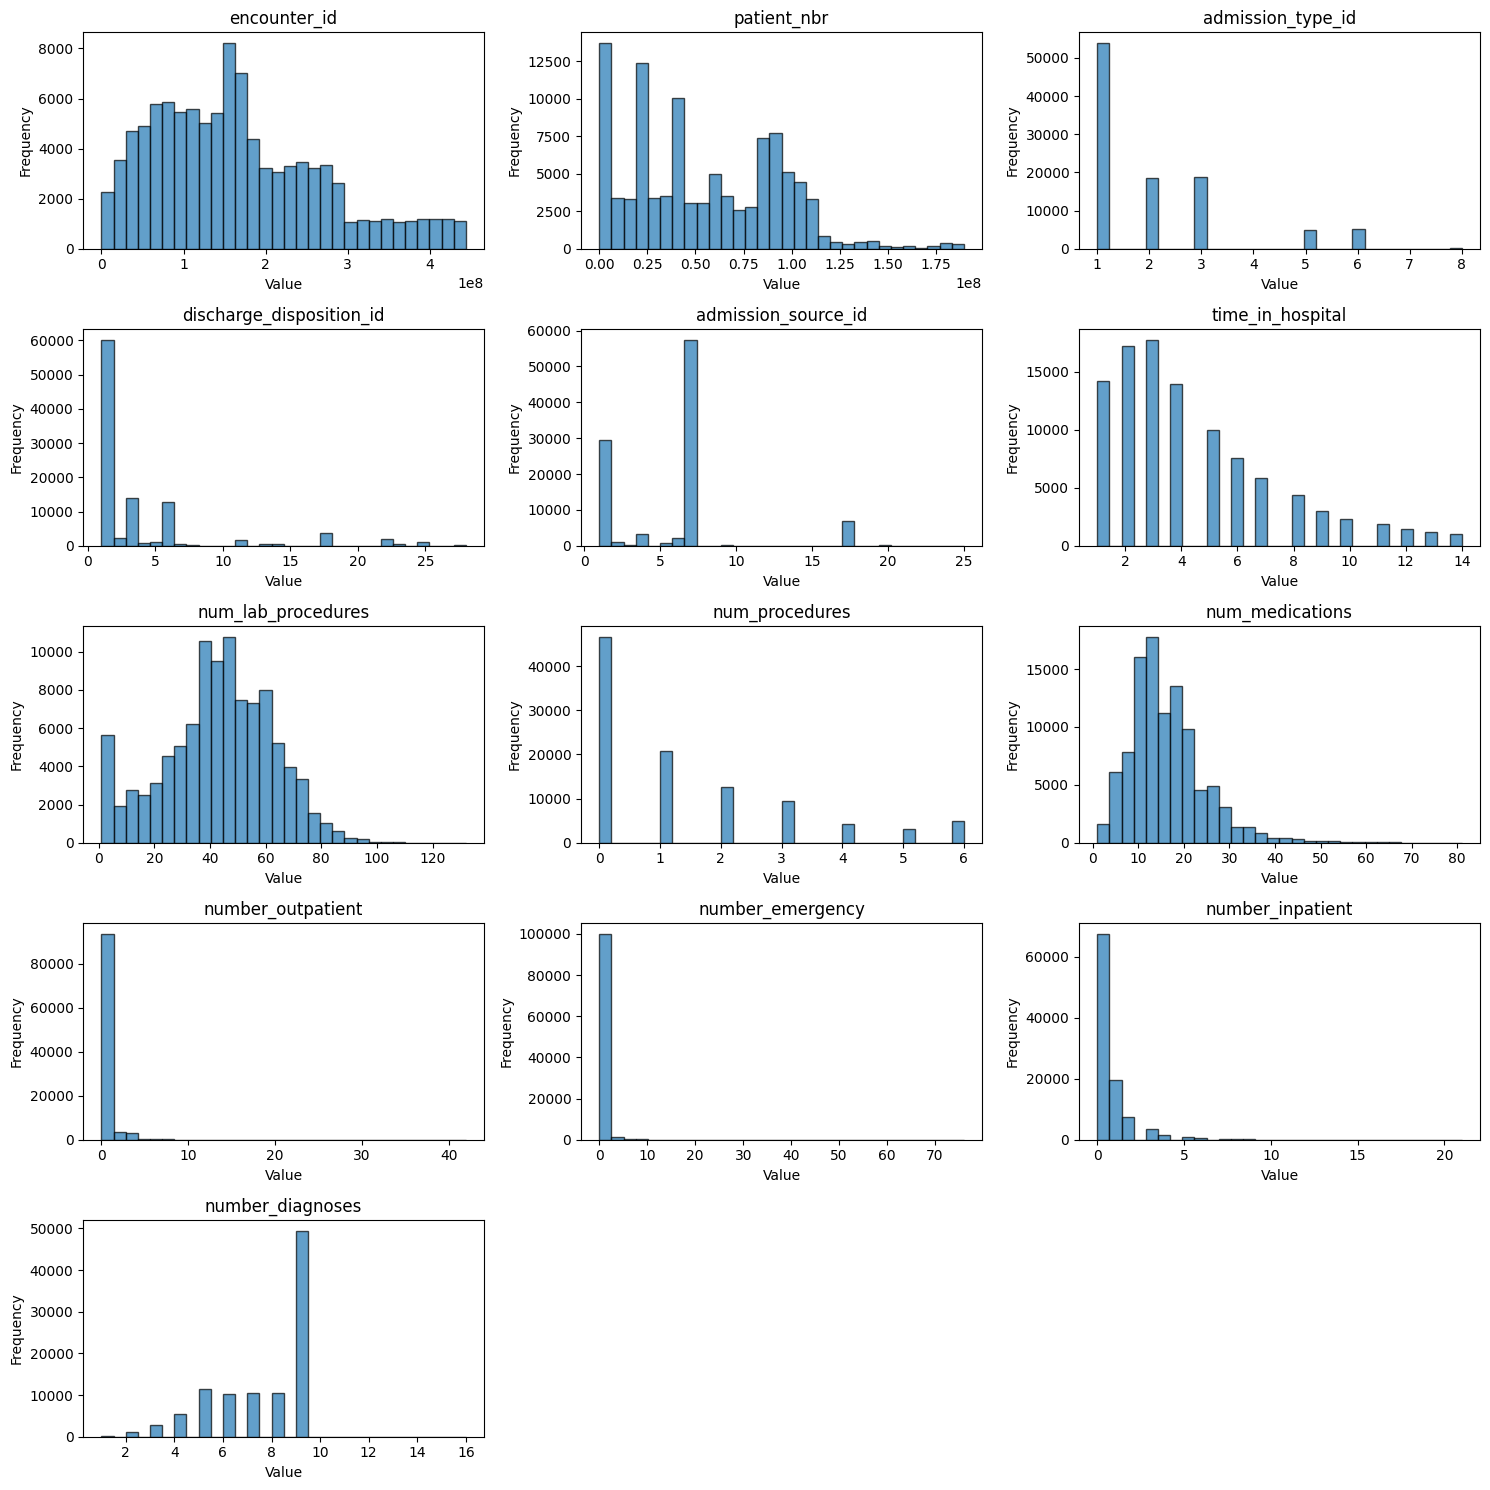

In [44]:
# Visualize numerical columns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 3, figsize=(15, 15))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')

# Hide unused subplots
for idx in range(len(numerical_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


In [41]:
# Check for outliers in numerical columns
print("\nOUTLIERS CHECK (using IQR method):")
print("="*80)
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers ({(len(outliers)/len(df)*100):.2f}%)")



OUTLIERS CHECK (using IQR method):
encounter_id: 0 outliers (0.00%)
patient_nbr: 247 outliers (0.24%)
admission_type_id: 341 outliers (0.34%)
discharge_disposition_id: 9818 outliers (9.65%)
admission_source_id: 6956 outliers (6.84%)
time_in_hospital: 2252 outliers (2.21%)
num_lab_procedures: 143 outliers (0.14%)
num_procedures: 4954 outliers (4.87%)
num_medications: 2557 outliers (2.51%)
number_outpatient: 16739 outliers (16.45%)
number_emergency: 11383 outliers (11.19%)
number_inpatient: 7049 outliers (6.93%)
number_diagnoses: 281 outliers (0.28%)


In [45]:
df["hospital_nbr"].nunique()


KeyError: 'hospital_nbr'